# BOTSON HOUSE PRICE PREDICTION

### IMPORTING THE REQUIRED LIBRARY

In [84]:
#import all important model requied for boston housing dataset analysis

import numpy as np 
import pandas as pd
import sklearn
import seaborn as sns  #to visualize the dataset
import matplotlib.pyplot as plt # for vizualize the dataset
%matplotlib inline
from pylab import rcParams #runTime configuration parameter to set the plot size
rcParams['figure.figsize']=6,4
import pickle #for save the model in pickle file

In [33]:
from sklearn.datasets import load_boston  #sklearn data for boston dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #linear regression model for analysis
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,confusion_matrix #checking the errors in prediction

In [56]:
import warnings
warnings.filterwarnings('ignore') # just to ignore the warnings 

In [7]:
boston=load_boston() # botson dataset from sklearn Datasets

In [8]:
type(boston) #checking the type

sklearn.utils.Bunch

In [9]:
boston.keys()  #total keys in boston are

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [58]:
print(boston.DESCR)#disricption code for seeing boston dataset detail

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
boston.feature_names  #total number of feature that is number of columns are 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
boston_shape=boston.data #use to checck the numberr of rows and columns
boston_shape.shape

(506, 13)

In [13]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names) #making a df adding features in data frame
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
boston_df['Price']=boston.target #adding target in df in name of Price
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


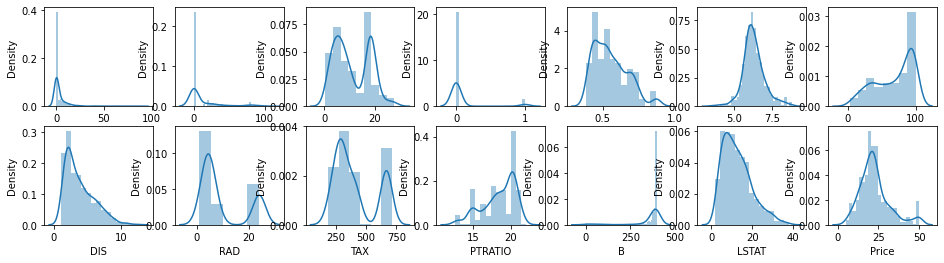

In [15]:
#distribution plot for the each features with price 
rows=2
cols=7
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=boston_df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(boston_df[col[index]],ax=ax[i][j])
        index=index+1

In [16]:
#correlation of coefficient value to find the each column for checking relationship of data with output

cormmat=boston_df.corr()
cormmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


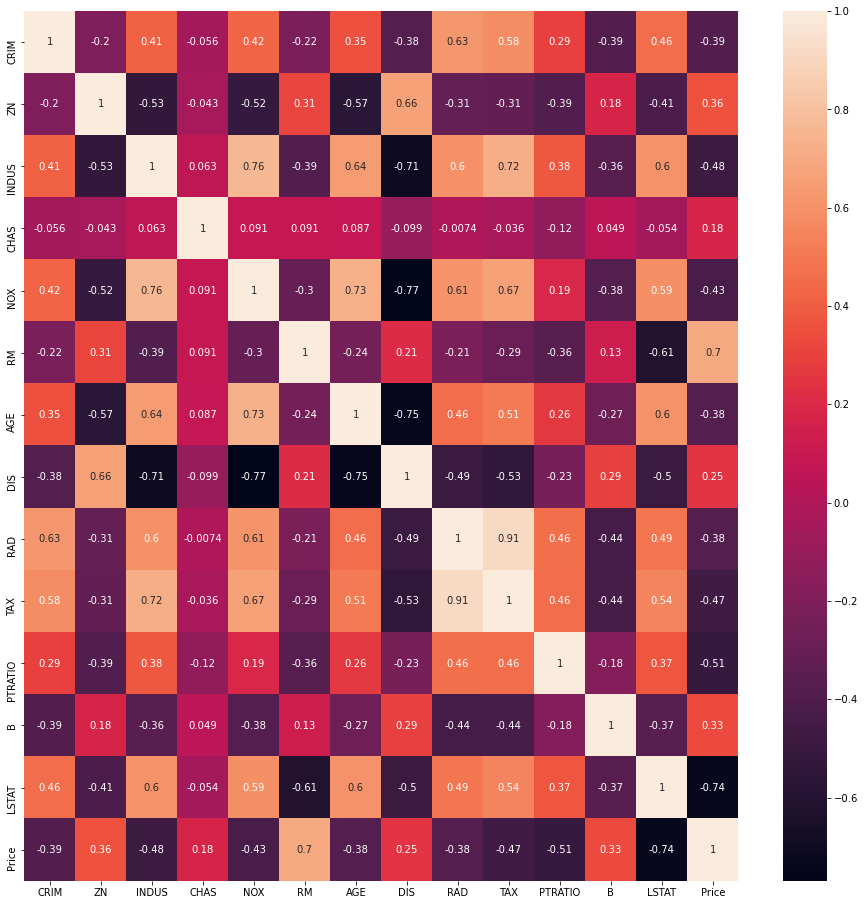

In [68]:
#heatman chart for corelation matrix

fig=plt.figure(figsize=(16,16))
fig.add_subplot(1,1,1)
sns.heatmap(boston_df.corr(),annot=True)
plt.show()

In [41]:
cormmat['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [18]:
#threshold value to find the correlation of each feature with each other by 0.50

def getCorrelatedFeature(corrdata,threshold):
    feature=[]
    value=[]
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
    df=pd.DataFrame(data=value,index=feature,columns=['corr value'])
    return df

In [19]:
threshold=0.50
corr_value=getCorrelatedFeature(cormmat['Price'],threshold)
corr_value

,corr value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [92]:
correlated_data=boston_df[corr_value.index] 
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


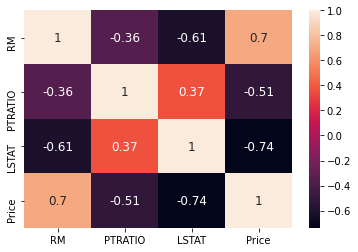

In [70]:
sns.heatmap(correlated_data.corr(),annot=True,annot_kws={'Size':12})
plt.show()

In [22]:
x=correlated_data.drop(labels=['Price'],axis=1) #seprating price from the data
y=correlated_data['Price']

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0) #testing data and spliting data

In [61]:
X_train.shape,X_test.shape

((404, 3), (102, 3))

In [62]:
#model creation 
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [63]:
y_predict=model.predict(X_test)

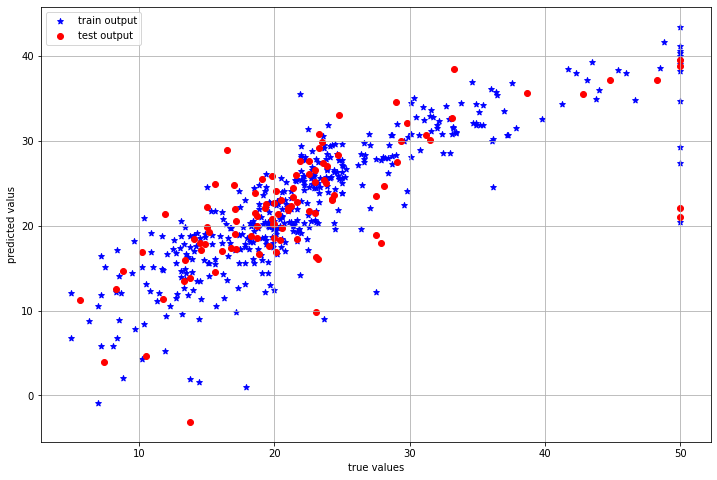

In [96]:
y_train_predict=model.predict(X_train)
plt.figure(figsize=(12,8))
plt.scatter(Y_train,y_train_predict,color='b',marker='*',label='train output')
plt.scatter(Y_test,y_predict,color='r',marker='o',label='test output')
plt.grid('on')
plt.xlabel('true values')
plt.ylabel('predicted valus')
plt.plot()
plt.legend(loc='upper left')
plt.show()

In [64]:
df=pd.DataFrame(data=[y_predict,Y_test])

In [65]:
df.T.head()

,0,1
0,27.609031,22.6
1,22.099034,50.0
2,26.529255,23.0
3,12.507986,8.3
4,22.254879,21.2


## Checking the error

In [66]:
score=r2_score(Y_test,y_predict)
mae=mean_absolute_error(Y_test,y_predict)
mse=mean_squared_error(Y_test,y_predict)
print('R2 score:- ',score)
print('Mean Absolute Error ',mae)
print('Mean squared Error :- ', mse)

R2 score:-  0.4881642015692508
Mean Absolute Error  4.404434993909257
Mean squared Error :-  41.67799012221682


In [90]:
file='BotsonModel.pkl'

with open(file,'wb') as f:
    pickle.dump(model,f)

# .......................................................end..................................................................